# **Task 1**

### **Preliminary analysis:**

**Structure of the data**

In [1]:
import pandas as pd
df = pd.read_excel('cep1_dataset.xlsx')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Missing values**

In [2]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Duplicates**

In [3]:
df.duplicated().sum()

1

In [4]:
#Dropping Duplicates
df=df.drop_duplicates()

In [5]:
#shape of database 
df.shape

(302, 14)

# **Task 2**

### <b>Prepare a report about the data explaining the distribution of the disease and the related factors using the steps listed below:</b>

**A. Get a preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data**

In [6]:
summary = df.describe()

#show the summary
print(summary)

             age         sex          cp    trestbps        chol         fbs  \
count  302.00000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean    54.42053    0.682119    0.963576  131.602649  246.500000    0.149007   
std      9.04797    0.466426    1.032044   17.563394   51.753489    0.356686   
min     29.00000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     48.00000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.50000    1.000000    1.000000  130.000000  240.500000    0.000000   
75%     61.00000    1.000000    2.000000  140.000000  274.750000    0.000000   
max     77.00000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  302.000000  302.000000  302.000000  302.000000  302.000000  302.000000   
mean     0.526490  149.569536    0.327815    1.043046    1.397351    0.718543   
std      0.526027   22.903527    0.4

**B. Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot**

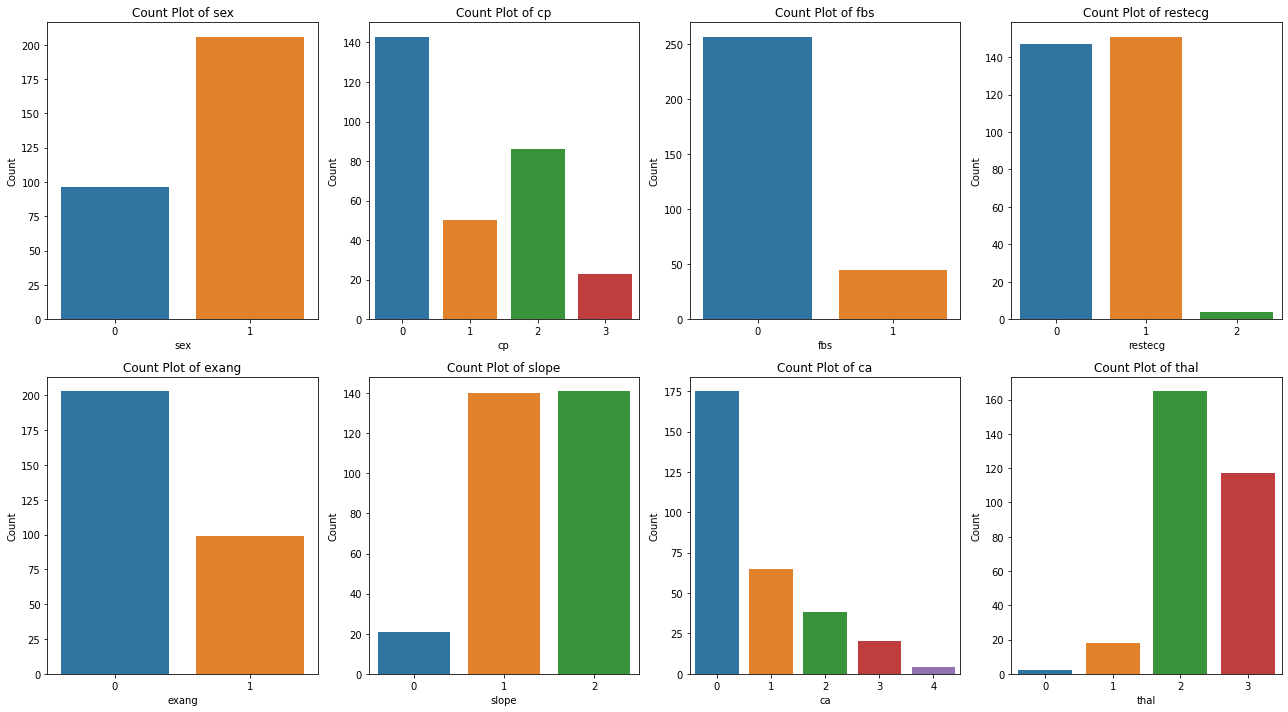

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a list of categorical variables
categ_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

# Loop through categorical variables and define count plots
for i, var in enumerate(categ_vars):
    row, col = i // 4, i % 4  
    sns.countplot(data=df, x=var, ax=axes[row, col])
    axes[row, col].set_title(f'Count Plot of {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Count')


plt.tight_layout()
plt.show()


**C. Study the occurrence of CVD across the Age category**

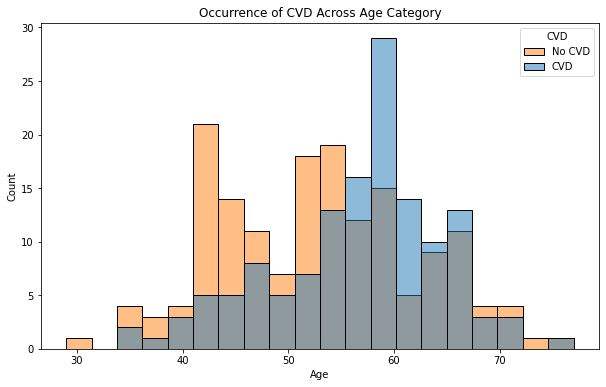

In [8]:
plt.figure(figsize=(10, 6))
#create a histplot 
sns.histplot(data=df, x='age', hue='target', bins=20)
plt.title('Occurrence of CVD Across Age Category')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='CVD', labels=['No CVD', 'CVD'])
plt.show()

**D. Study the composition of all patients with respect to the Sex category**

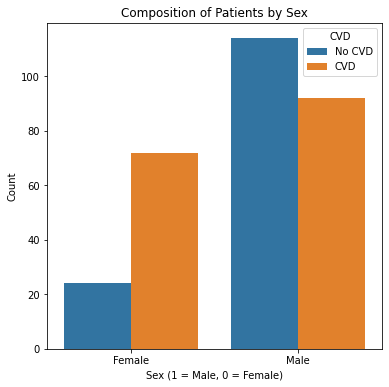

In [9]:
plt.figure(figsize=(6, 6))
#Create a countplot
sns.countplot(data=df, x='sex', hue='target')
plt.title('Composition of Patients by Sex')
plt.xlabel('Sex (1 = Male, 0 = Female)')
plt.ylabel('Count')
plt.legend(title='CVD', labels=['No CVD', 'CVD'])
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()

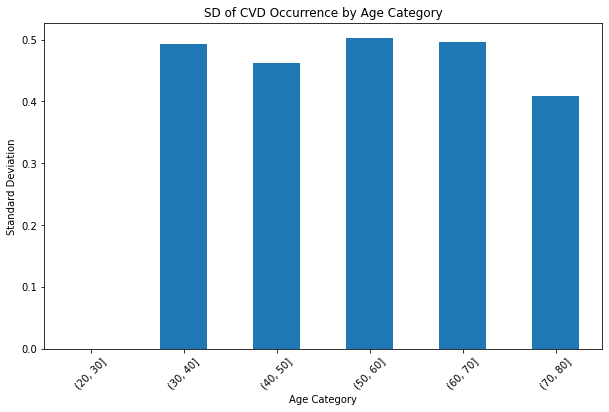

In [10]:
# Create age bins
age_bins = [20, 30, 40, 50, 60, 70, 80]

# Group data with age category and calculate the std deviation of CVD
df['Age_Category'] = pd.cut(df['age'], bins=age_bins)
std_deviation_by_age = df.groupby('Age_Category')['target'].std()

#Build a bar chart to visualize the standard deviations by age category
plt.figure(figsize=(10, 6))
std_deviation_by_age.plot(kind='bar', rot=45)
plt.title('SD of CVD Occurrence by Age Category')
plt.xlabel('Age Category')
plt.ylabel('Standard Deviation')
plt.show()


**E.Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient**

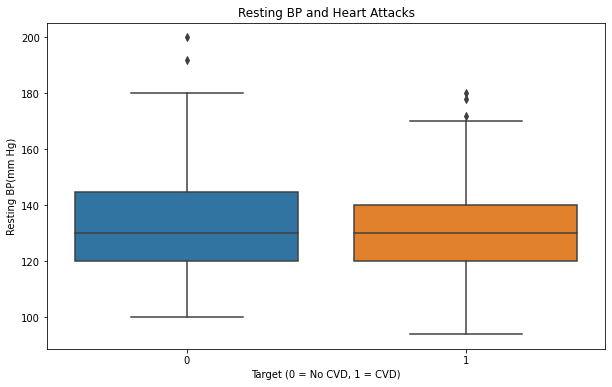

In [30]:
plt.figure(figsize=(10, 6))
#Create a boxplot
sns.boxplot(data=df, x='target', y='trestbps')
plt.title('Resting BP and Heart Attacks')
plt.xlabel('Target (0 = No CVD, 1 = CVD)')
plt.ylabel('Resting BP(mm Hg)')
plt.show()

**F.Describe the relationship between cholesterol levels and a target variable**

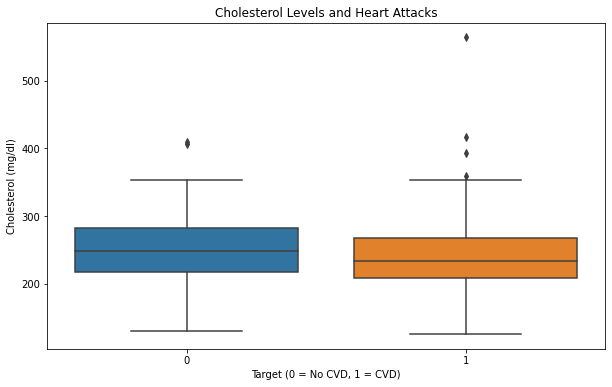

In [31]:
plt.figure(figsize=(10, 6))
#Create a boxplot
sns.boxplot(data=df, x='target', y='chol')
plt.title('Cholesterol Levels and Heart Attacks')
plt.xlabel('Target (0 = No CVD, 1 = CVD)')
plt.ylabel('Cholesterol (mg/dl)')
plt.show()

**G. State what relationship exists between peak exercising and the occurrence of a heart attack**

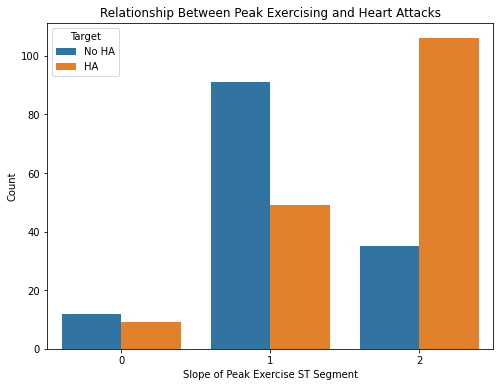

In [13]:
plt.figure(figsize=(8, 6))
#Create a countplot
sns.countplot(data=df, x='slope', hue='target')
plt.title('Relationship Between Peak Exercising and Heart Attacks')
plt.xlabel('Slope of Peak Exercise ST Segment')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No HA', 'HA'])
plt.show()

**H. Check if thalassemia is a major cause of CVD**

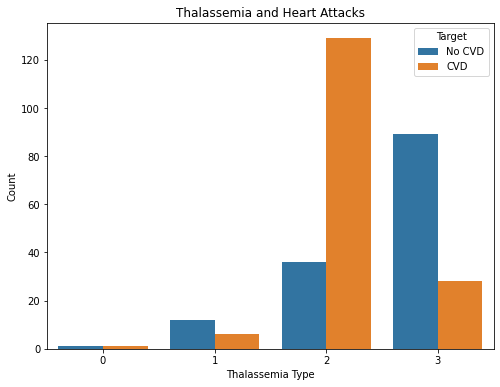

In [14]:
plt.figure(figsize=(8, 6))
#create a countplot 
sns.countplot(data=df, x='thal', hue='target')
plt.title('Thalassemia and Heart Attacks')
plt.xlabel('Thalassemia Type')
plt.ylabel('Count')
plt.legend(title='Target', labels=['No CVD', 'CVD'])
plt.show()


**I. List how the other factors determine the occurrence of CVD**

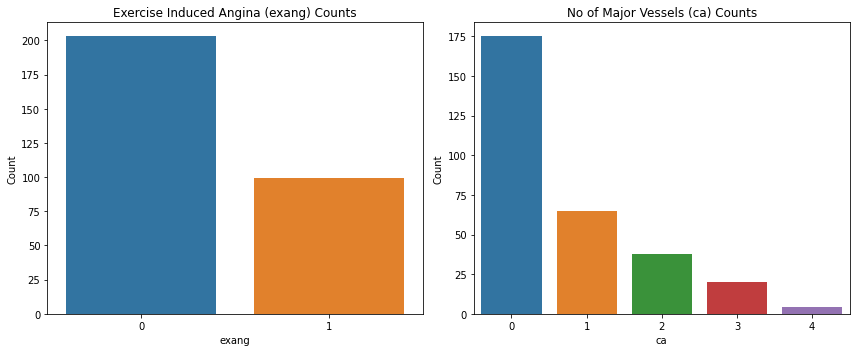

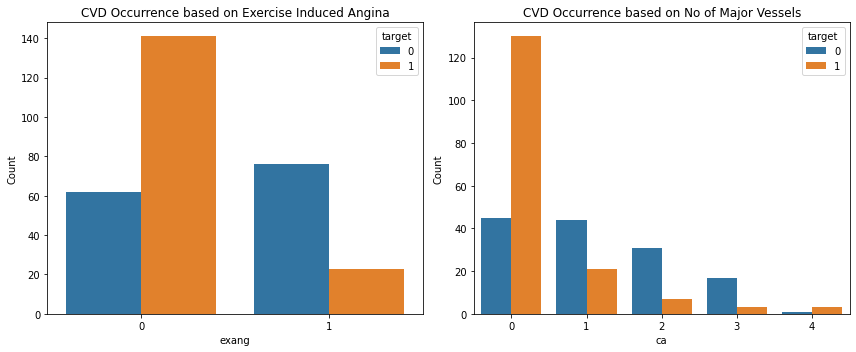

In [33]:
# Select relevant columns for analysis
columns_of_interest = ['exang', 'ca', 'target']  # Consider 'Target' as the CVD occurrence variable
selected_data = df[columns_of_interest]

# Descriptive analysis of 'exang' and 'ca' variables
exang_counts = selected_data['exang'].value_counts()
ca_counts = selected_data['ca'].value_counts()


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x=exang_counts.index, y=exang_counts.values)
plt.title('Exercise Induced Angina (exang) Counts')
plt.xlabel('exang')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.barplot(x=ca_counts.index, y=ca_counts.values)
plt.title('No of Major Vessels (ca) Counts')
plt.xlabel('ca')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Examine the relationship between 'exang', 'ca', and CVD 
exang_cvd = selected_data.groupby(['exang', 'target']).size().unstack()
ca_cvd = selected_data.groupby(['ca', 'target']).size().unstack()

# Show relationship between 'exang', 'ca', and CVD
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.countplot(x='exang', hue='target', data=df)
plt.title('CVD Occurrence based on Exercise Induced Angina')
plt.xlabel('exang')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
sns.countplot(x='ca', hue='target', data=df)
plt.title('CVD Occurrence based on No of Major Vessels')
plt.xlabel('ca')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


**J. Use a pair plot to understand the relationship between all the given variables**

<Figure size 1080x720 with 0 Axes>

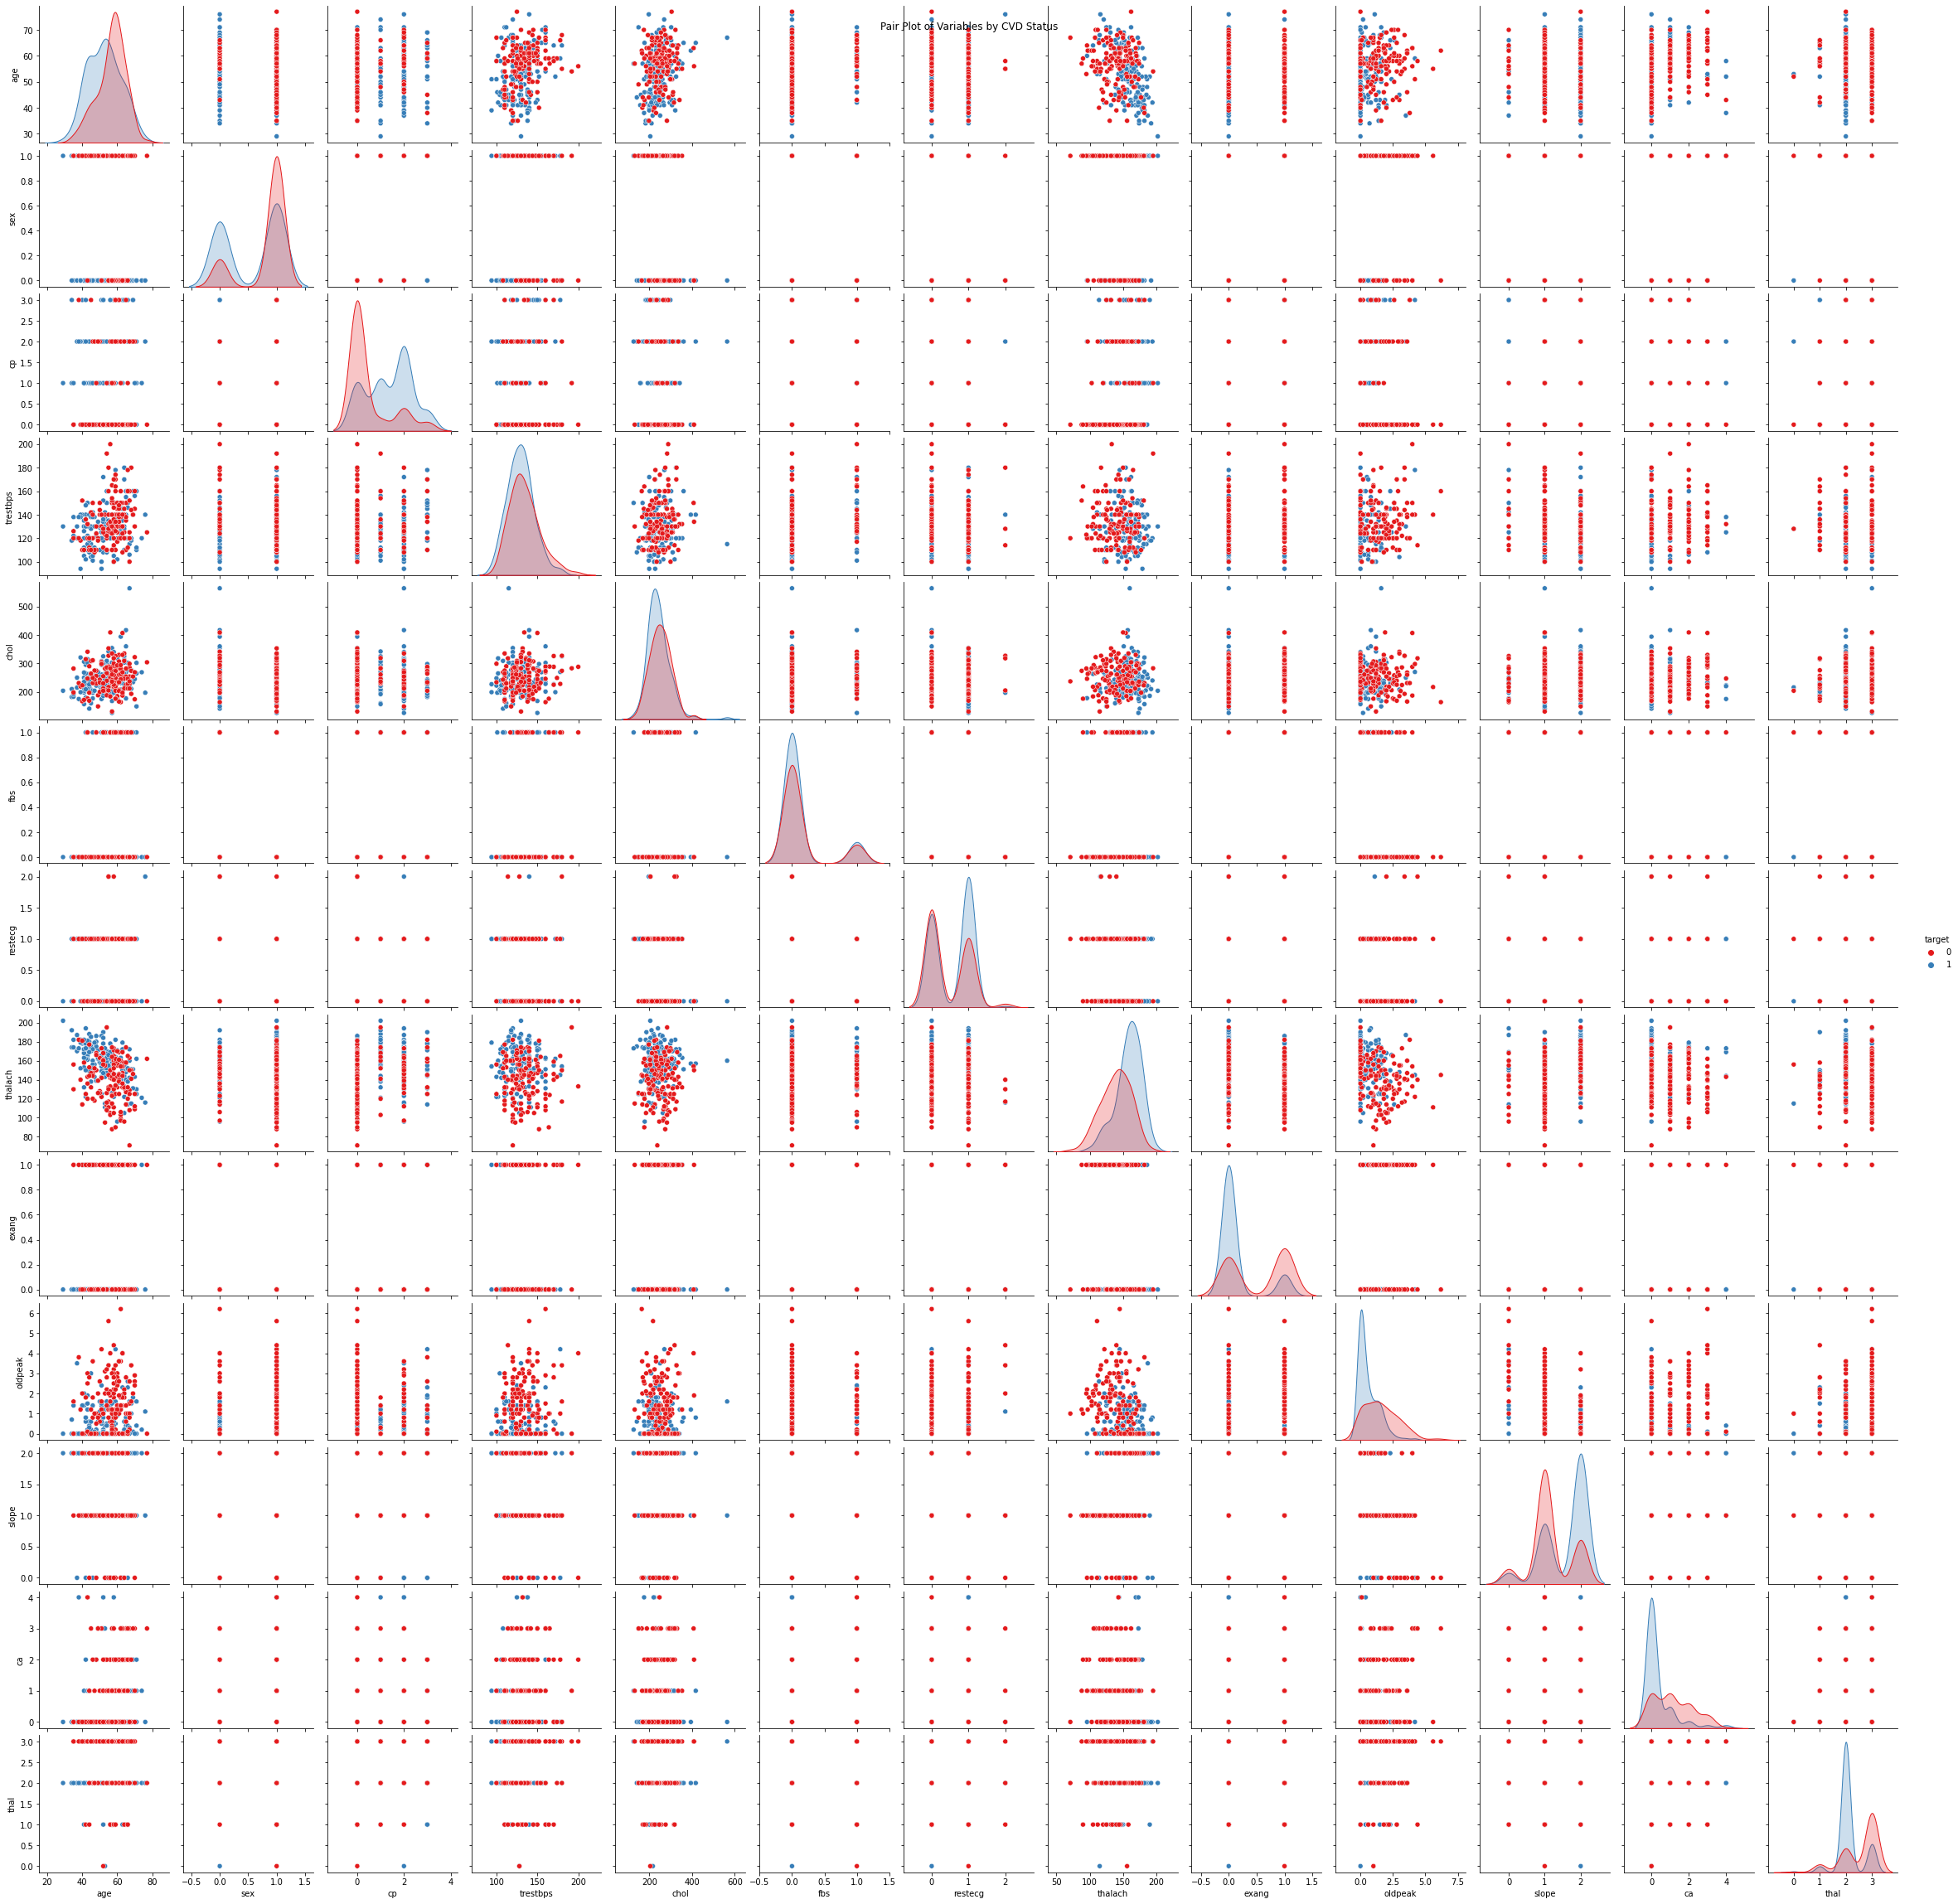

In [16]:
plt.figure(figsize=(15, 10))

# Select columns for the pair plot
selected_columns = ['age', 'sex','cp','trestbps', 'chol','fbs','restecg', 'thalach','exang', 'oldpeak', 'slope', 'ca', 'thal','target']

# Create a pair plot
sns.pairplot(df[selected_columns], hue='target', palette = 'Set1')
plt.suptitle('Pair Plot of Variables by CVD Status')

plt.show()


In [19]:
#Copying data to new database 
data =df.copy()
data.drop('Age_Category',inplace=True,axis=1) 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


# **Task 3**

### **Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
X = data.drop(['target',], axis=1)
y = data['target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scaling data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.transform(X_test) 

# Logistic Regression Model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))

#Random Forest Model
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy)


Logistic Regression Accuracy: 0.8360655737704918
Random Forest Accuracy: 0.8688524590163934


### **Explore the results while using correlation analysis**

In [23]:
correlation_matrix = data.corr()
correlation_with_target = correlation_matrix['target'].sort_values(ascending=False)
print("Correlation with Target Variable:\n", correlation_with_target)

Correlation with Target Variable:
 target      1.000000
cp          0.432080
thalach     0.419955
slope       0.343940
restecg     0.134874
fbs        -0.026826
chol       -0.081437
trestbps   -0.146269
age        -0.221476
sex        -0.283609
thal       -0.343101
ca         -0.408992
oldpeak    -0.429146
exang      -0.435601
Name: target, dtype: float64


### **Logistic regression (leveraging standard error and p-values from statsmodels) for feature selection**

In [27]:
import statsmodels.api as sm

# Add intercept for logistic regression model
X_with_intercept = sm.add_constant(X_train)
logreg_model = sm.Logit(y_train, X_with_intercept)
result = logreg_model.fit()

p_values = result.pvalues

# Identify important features based on p-values
significant_features = p_values[p_values < 0.05].index
print("Significant Features based on p-values:\n", significant_features)


Optimization terminated successfully.
         Current function value: 0.347733
         Iterations 7
Significant Features based on p-values:
 Index(['sex', 'cp', 'trestbps', 'thalach', 'exang', 'slope', 'ca', 'thal'], dtype='object')
